# Jobcloud data exploration part 2

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import sys

In [2]:
print(sys.version); print(pd.__version__)

3.6.8 |Anaconda, Inc.| (default, Feb 21 2019, 18:30:04) [MSC v.1916 64 bit (AMD64)]
0.24.2


### costum functions

In [3]:
def value_counts_df(df_input, col_input, sort_col='counts', ascending_input=True):
    return df_input[col_input].value_counts().rename_axis(col_input).reset_index(name='counts').sort_values(by=sort_col, ascending=ascending_input)

### reading in data

In [6]:
df = pd.read_csv('Data/jobcloud_features_v2.csv', delimiter = ';', parse_dates = ['start_dt', 'end_dt'])

In [7]:
df.head()

,id,start_dt,end_dt,1d_view_cnt,10d_view_cnt,30d_view_cnt,package_id,industry_name,job_location,job_postal_code,...,title_aggressive,title_female,title_percent,title_location,title_diploma,title_chief,title_prob_en,title_prob_de,title_prob_fr,title_lang
0,8501672,2018-10-25,2018-11-26,0.2372,0.4565,0.7327,B,Industrie diverse,Espace Mittelland,NaN,...,0,1,0,0,0,0,0.0,0.999994,0.0,de
1,8501682,2018-10-25,2018-11-26,0.2883,0.5826,1.0991,B,Maschinen-/Anlagenbau,Region Biel,NaN,...,0,0,0,0,0,0,0.0,0.999996,0.0,de
2,8570830,2018-11-26,2018-12-28,0.1982,0.8468,1.1532,B,Industrie diverse,Espace Mittelland,NaN,...,0,1,0,0,0,0,0.0,0.999994,0.0,de
3,8649301,2019-01-08,2019-02-08,0.2883,0.7177,1.4835,B,Maschinen-/Anlagenbau,Espace Mittelland,NaN,...,0,1,0,0,0,0,0.0,0.999995,0.0,de
4,8730602,2019-02-12,2019-02-21,0.3574,0.7297,0.7297,B,Industrie diverse,Region Biel,NaN,...,0,0,0,0,0,0,0.0,0.999997,0.0,de


In [8]:
industries = df['industry_name'].unique()
languages = df['title_lang'].unique()

In [9]:
df.columns

Index(['id', 'start_dt', 'end_dt', '1d_view_cnt', '10d_view_cnt',
       '30d_view_cnt', 'package_id', 'industry_name', 'job_location',
       'job_postal_code', 'contract_pct_from', 'contract_pct_to', 'title',
       'title_clean', 'month', 'weekday', 'dayofyear', 'days_online',
       'pct_range', 'city', 'title_num_words', 'title_aggressive',
       'title_female', 'title_percent', 'title_location', 'title_diploma',
       'title_chief', 'title_prob_en', 'title_prob_de', 'title_prob_fr',
       'title_lang'],
      dtype='object')

In [10]:
languages

array(['de', 'en', 'none', 'fr'], dtype=object)

In [11]:
industries.shape

(24,)

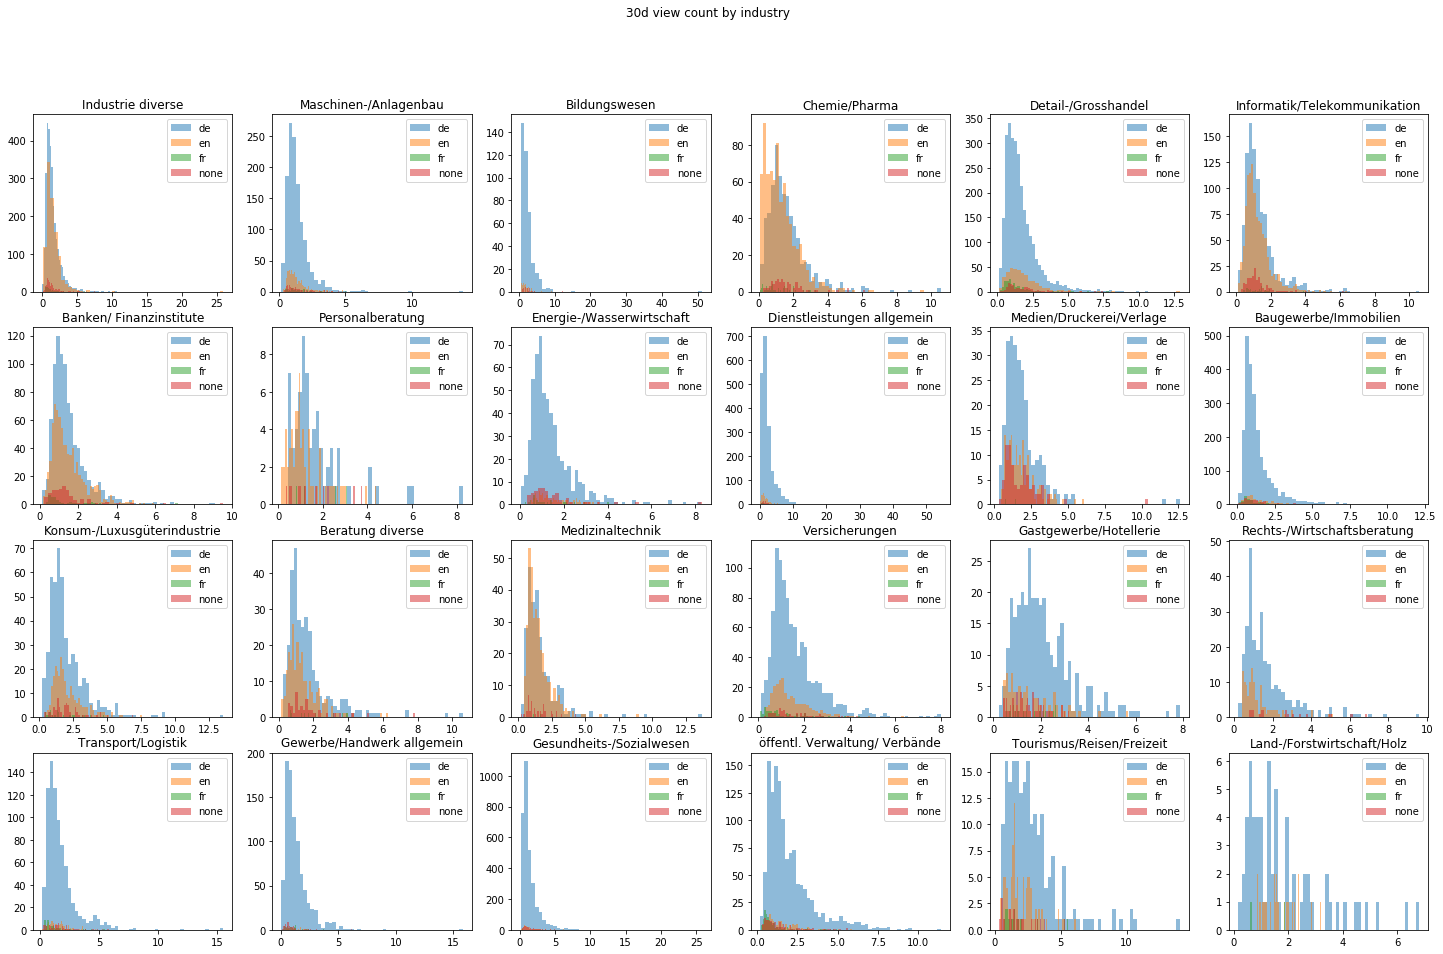

In [12]:
fig, ax = plt.subplots(sharex=False)
fig.set_size_inches((25, 15))
fig.suptitle('30d view count by industry')
for i, industry in enumerate(industries):
    plt.subplot(4, 6, i + 1)
    plt.hist(df.loc[(df['industry_name'] == industry) & (df['days_online'] >= 30) & (df['title_lang'] == 'de'), '30d_view_cnt'], alpha = 0.5, bins=50, label = 'de')
    plt.hist(df.loc[(df['industry_name'] == industry) & (df['days_online'] >= 30) & (df['title_lang'] == 'en'), '30d_view_cnt'], alpha = 0.5, bins=50, label = 'en')
    plt.hist(df.loc[(df['industry_name'] == industry) & (df['days_online'] >= 30) & (df['title_lang'] == 'fr'), '30d_view_cnt'], alpha = 0.5, bins=50, label = 'fr')
    plt.hist(df.loc[(df['industry_name'] == industry) & (df['days_online'] >= 30) & (df['title_lang'] == 'none'), '30d_view_cnt'], alpha = 0.5, bins=50, label = 'none')
    plt.title(industry)
    plt.legend()

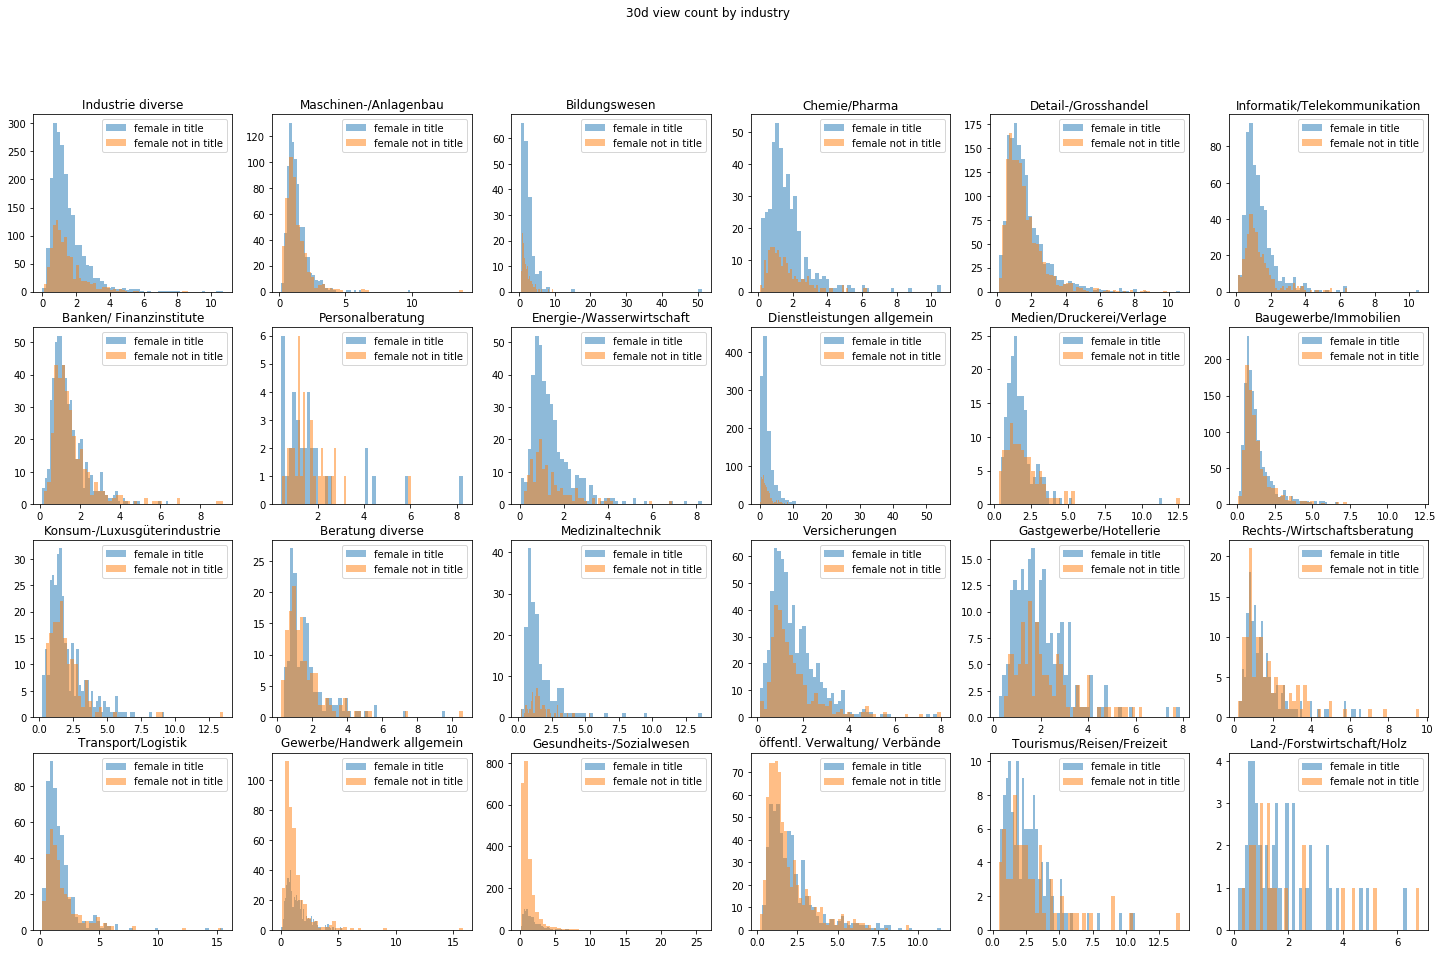

In [16]:
fig, ax = plt.subplots(sharex=False)
fig.set_size_inches((25, 15))
fig.suptitle('30d view count by industry')
for i, industry in enumerate(industries):
    plt.subplot(4, 6, i + 1)
    plt.hist(df.loc[(df['industry_name'] == industry) & (df['days_online'] >= 30) & (df['title_female'] == 1) & (df['title_lang'] == 'de'), '30d_view_cnt'], alpha = 0.5, bins=50, label = 'female in title')
    plt.hist(df.loc[(df['industry_name'] == industry) & (df['days_online'] >= 30) & (df['title_female'] ==  0) & (df['title_lang'] == 'de'), '30d_view_cnt'], alpha = 0.5, bins=50, label = 'female not in title')
    plt.title(industry)
    plt.legend()

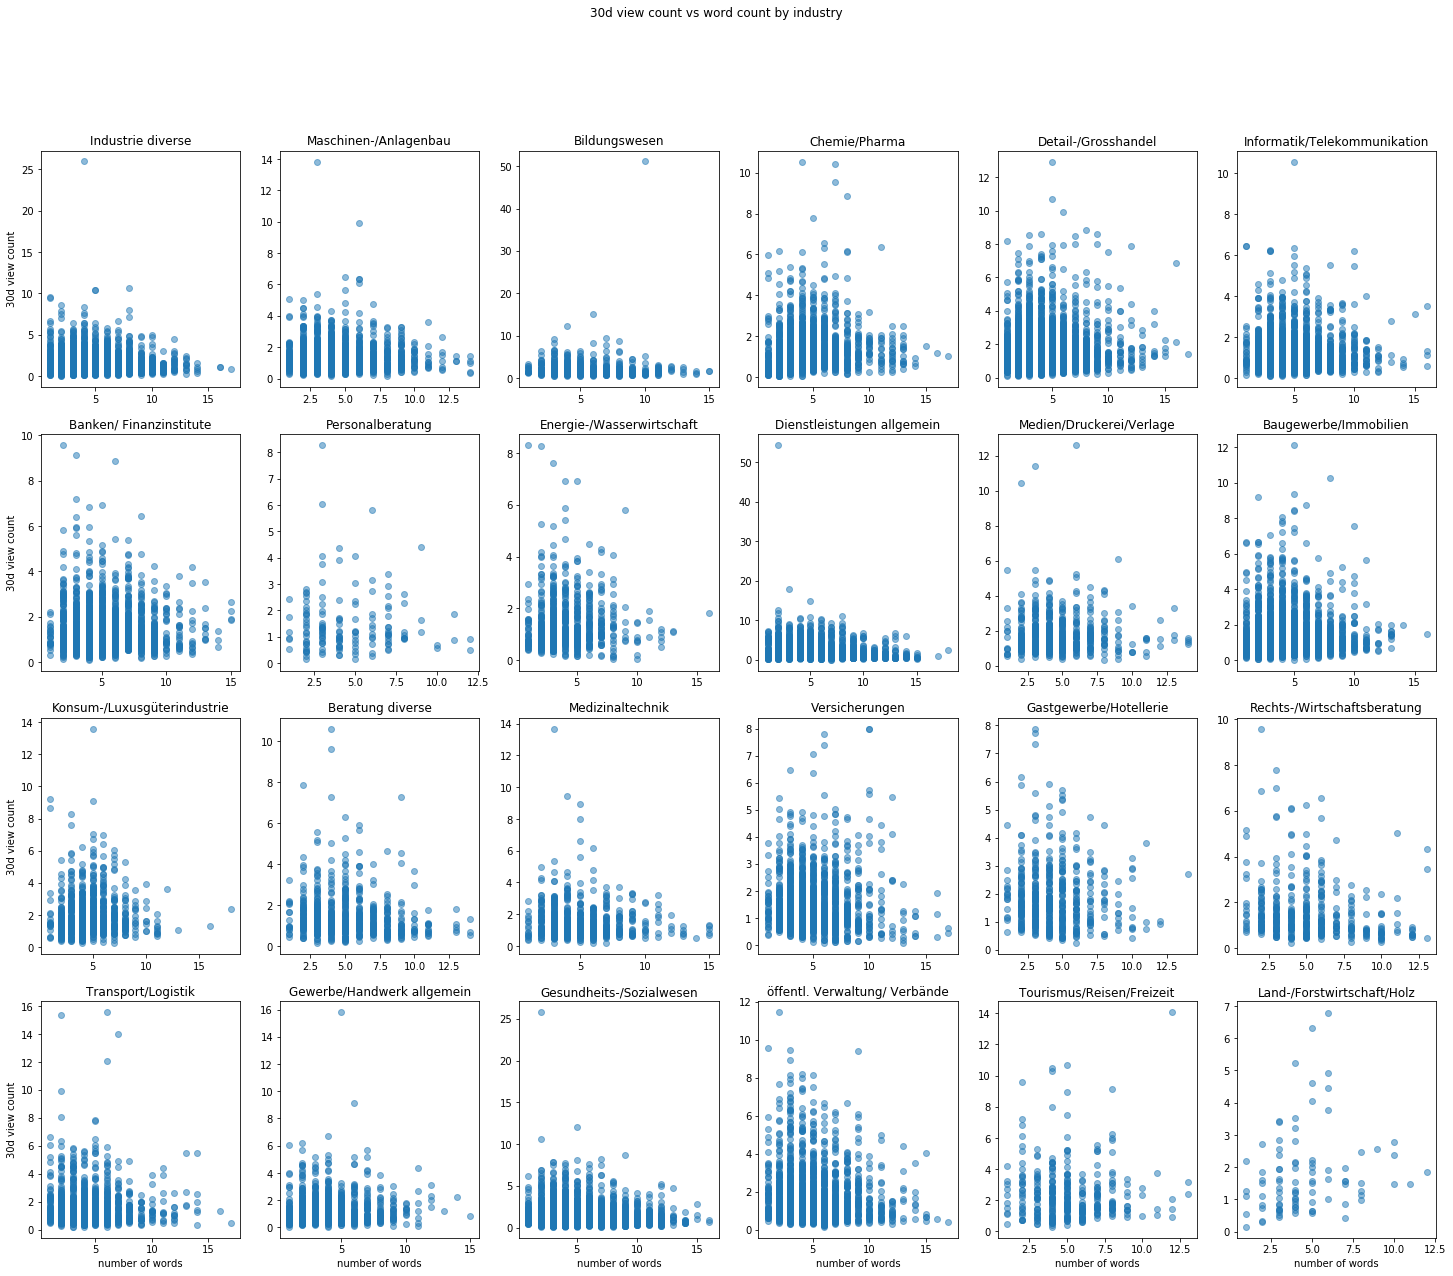

In [17]:
fig, ax = plt.subplots(sharex=False)
fig.set_size_inches((25, 20))
fig.suptitle('30d view count vs word count by industry')
for i, industry in enumerate(industries):
    plt.subplot(4, 6, i + 1)
    plt.scatter(df.loc[(df['industry_name'] == industry) & (df['days_online'] >= 30), 'title_num_words'], 
                df.loc[(df['industry_name'] == industry) & (df['days_online'] >= 30), '30d_view_cnt'], 
                alpha = 0.5)
    #plt.hist(df.loc[(df['industry_name'] == industry) & (df['days_online'] >= 30) & (df['title_aggressive'] ==  0), '30d_view_cnt'], alpha = 0.5, bins=50, label = 0)
    if i >= 18:
        plt.xlabel('number of words')
    if i in [0, 6, 12, 18]:
        plt.ylabel('30d view count')
    plt.title(industry)
    #plt.legend()

In [18]:
import seaborn as sns

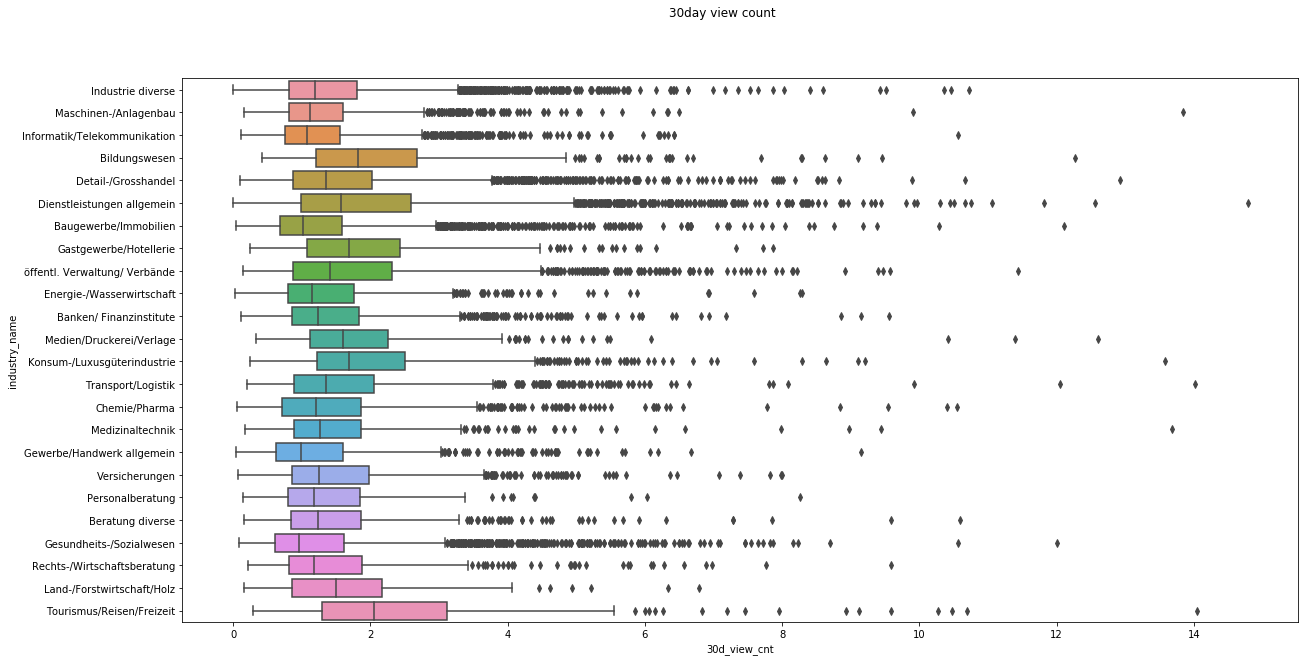

In [19]:
fig, ax = plt.subplots(figsize = (20, 10))
ax = sns.boxplot(y="industry_name", x="30d_view_cnt", data=df.loc[(df['30d_view_cnt'] < 15) & (df['days_online'] >= 30), :], orient='h')
fig.suptitle('30day view count')
None

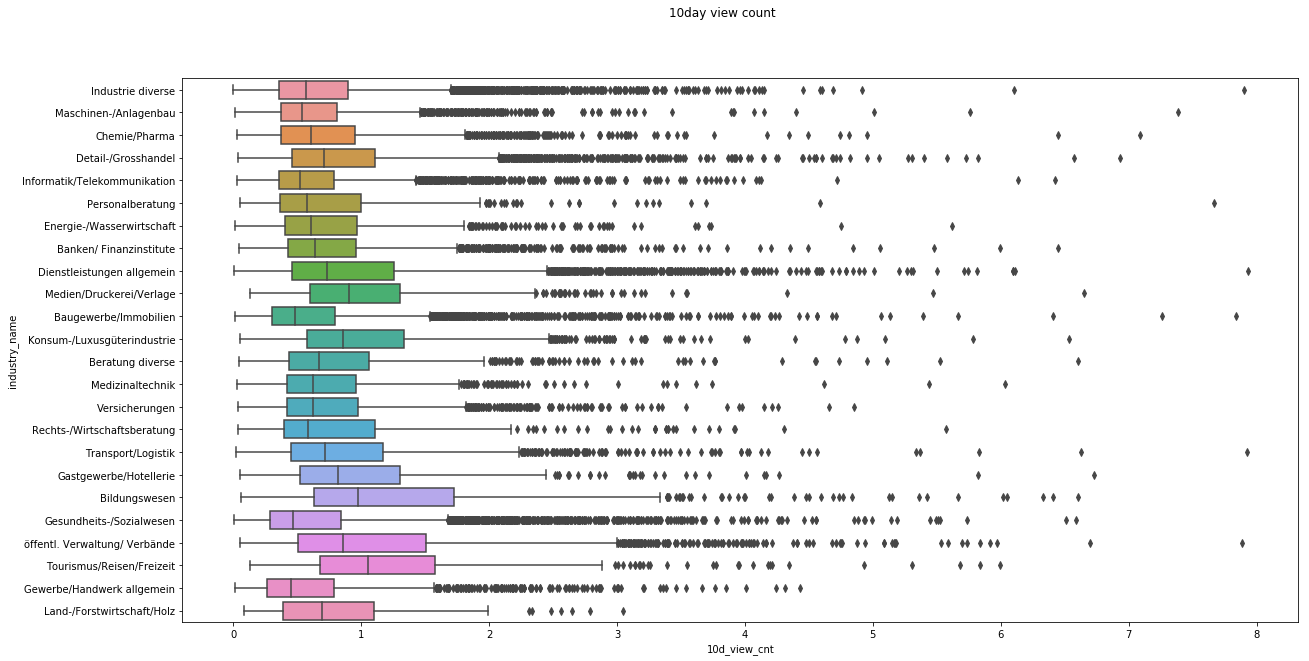

In [20]:
fig, ax = plt.subplots(figsize = (20, 10))
ax = sns.boxplot(y="industry_name", x="10d_view_cnt", data=df.loc[(df['10d_view_cnt'] < 8) & (df['days_online'] >= 10), :], orient='h')
fig.suptitle('10day view count')
None

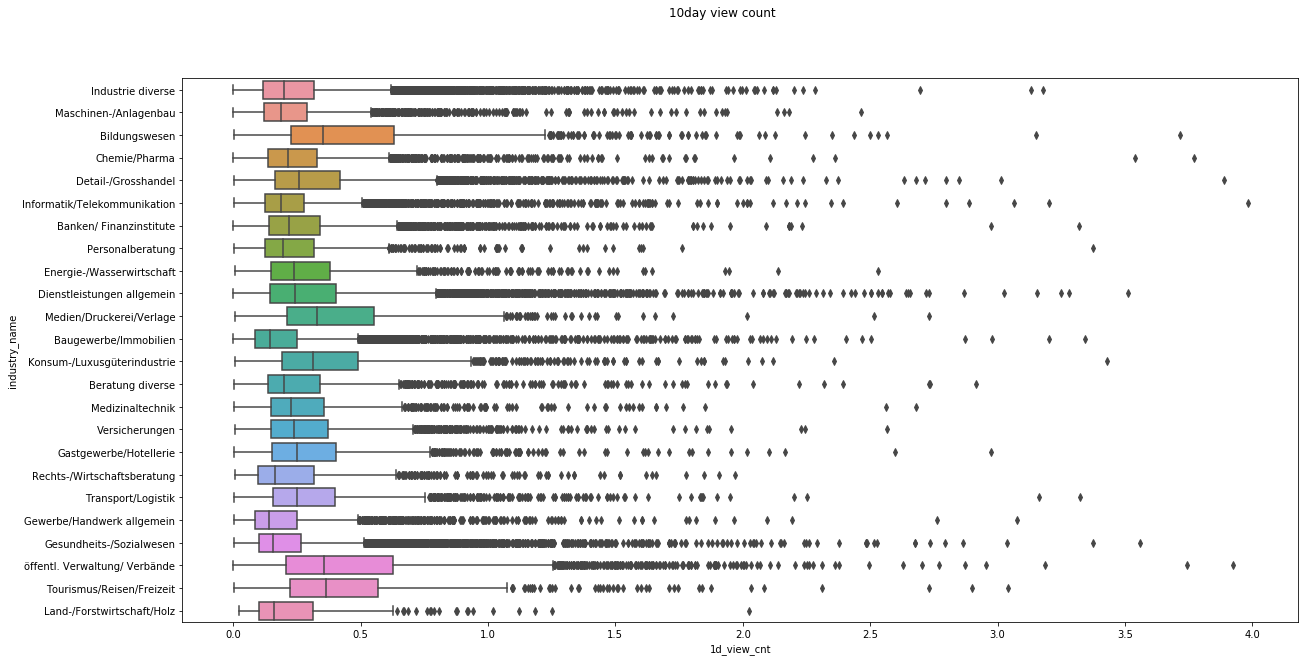

In [21]:
fig, ax = plt.subplots(figsize = (20, 10))
ax = sns.boxplot(y="industry_name", x="1d_view_cnt", data=df.loc[(df['1d_view_cnt'] < 4), :], orient='h')
fig.suptitle('10day view count')
None

## conditional bar charts

In [22]:
df.head()

,id,start_dt,end_dt,1d_view_cnt,10d_view_cnt,30d_view_cnt,package_id,industry_name,job_location,job_postal_code,...,title_aggressive,title_female,title_percent,title_location,title_diploma,title_chief,title_prob_en,title_prob_de,title_prob_fr,title_lang
0,8501672,2018-10-25,2018-11-26,0.2372,0.4565,0.7327,B,Industrie diverse,Espace Mittelland,NaN,...,0,1,0,0,0,0,0.0,0.999994,0.0,de
1,8501682,2018-10-25,2018-11-26,0.2883,0.5826,1.0991,B,Maschinen-/Anlagenbau,Region Biel,NaN,...,0,0,0,0,0,0,0.0,0.999996,0.0,de
2,8570830,2018-11-26,2018-12-28,0.1982,0.8468,1.1532,B,Industrie diverse,Espace Mittelland,NaN,...,0,1,0,0,0,0,0.0,0.999994,0.0,de
3,8649301,2019-01-08,2019-02-08,0.2883,0.7177,1.4835,B,Maschinen-/Anlagenbau,Espace Mittelland,NaN,...,0,1,0,0,0,0,0.0,0.999995,0.0,de
4,8730602,2019-02-12,2019-02-21,0.3574,0.7297,0.7297,B,Industrie diverse,Region Biel,NaN,...,0,0,0,0,0,0,0.0,0.999997,0.0,de


In [23]:
DAYS = 10 # 1, 10, or 30
df = df.loc[df['days_online'] >= DAYS]

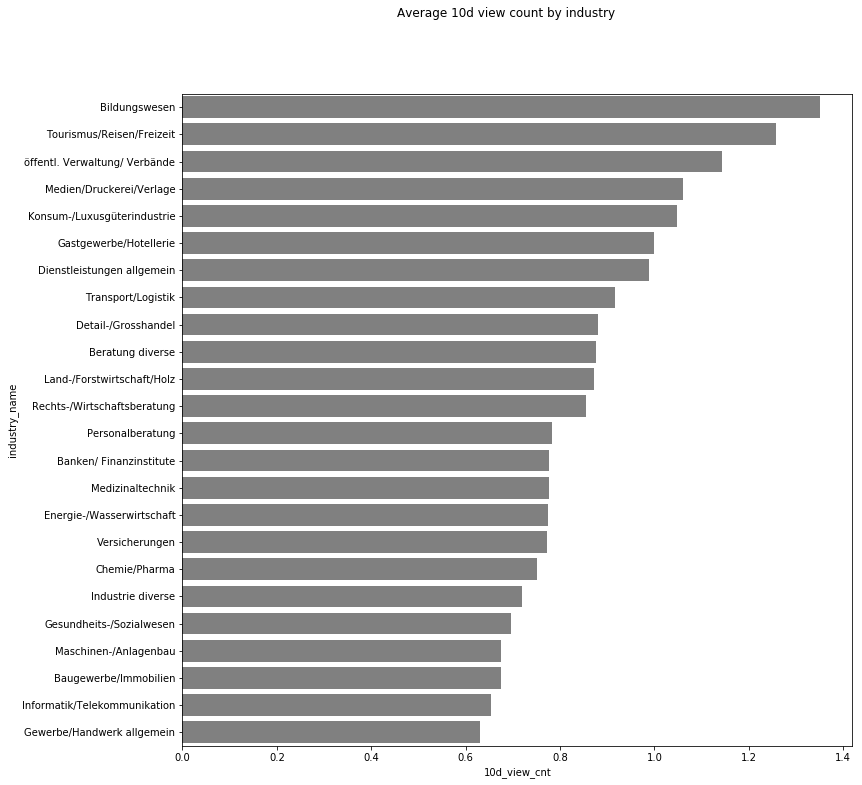

In [24]:
fig, ax = plt.subplots(figsize=(12, 12))
sns.barplot(y="industry_name", x="10d_view_cnt", data=df.groupby('industry_name')['10d_view_cnt'].mean().reset_index().sort_values('10d_view_cnt', ascending = False), ax = ax, color = 'grey')
fig.suptitle('Average 10d view count by industry')
None

In [25]:
df.head()

,id,start_dt,end_dt,1d_view_cnt,10d_view_cnt,30d_view_cnt,package_id,industry_name,job_location,job_postal_code,...,title_aggressive,title_female,title_percent,title_location,title_diploma,title_chief,title_prob_en,title_prob_de,title_prob_fr,title_lang
0,8501672,2018-10-25,2018-11-26,0.2372,0.4565,0.7327,B,Industrie diverse,Espace Mittelland,NaN,...,0,1,0,0,0,0,0.0,0.999994,0.0,de
1,8501682,2018-10-25,2018-11-26,0.2883,0.5826,1.0991,B,Maschinen-/Anlagenbau,Region Biel,NaN,...,0,0,0,0,0,0,0.0,0.999996,0.0,de
2,8570830,2018-11-26,2018-12-28,0.1982,0.8468,1.1532,B,Industrie diverse,Espace Mittelland,NaN,...,0,1,0,0,0,0,0.0,0.999994,0.0,de
3,8649301,2019-01-08,2019-02-08,0.2883,0.7177,1.4835,B,Maschinen-/Anlagenbau,Espace Mittelland,NaN,...,0,1,0,0,0,0,0.0,0.999995,0.0,de
5,8737153,2019-02-14,2019-03-18,0.6456,1.3604,2.4144,B,Industrie diverse,Region Biel,NaN,...,0,0,0,0,0,0,0.0,0.999998,0.0,de


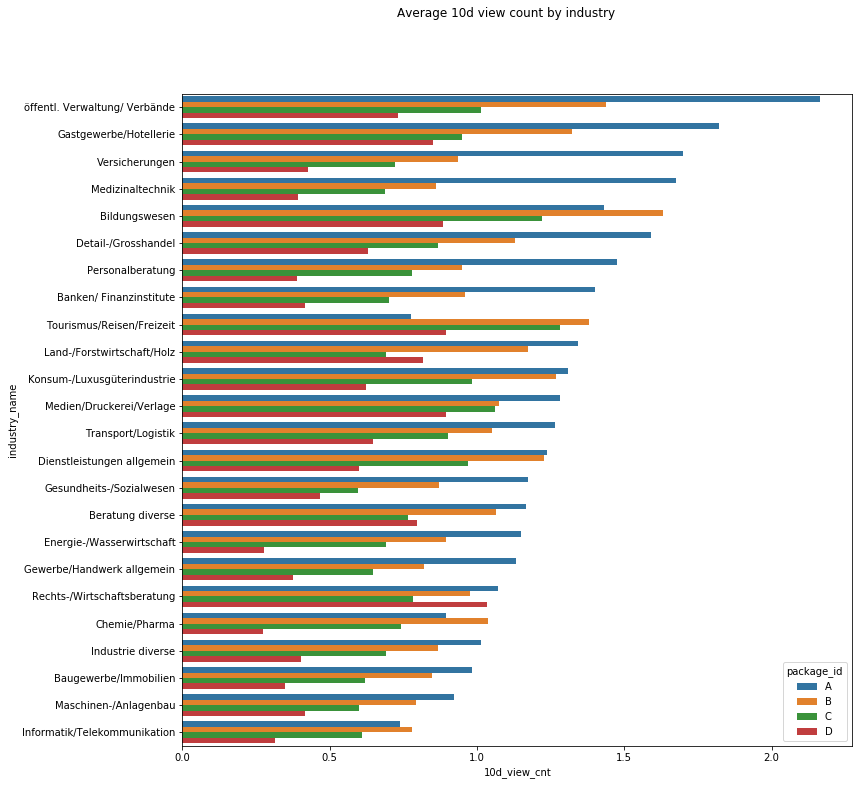

In [26]:
fig, ax = plt.subplots(figsize=(12, 12))
sns.barplot(y="industry_name", x="10d_view_cnt", 
            data=df.groupby(['industry_name', 'package_id'])['10d_view_cnt'].mean().reset_index().sort_values('10d_view_cnt', ascending = False), 
            hue = 'package_id', 
            ax = ax)
fig.suptitle('Average 10d view count by industry')
None

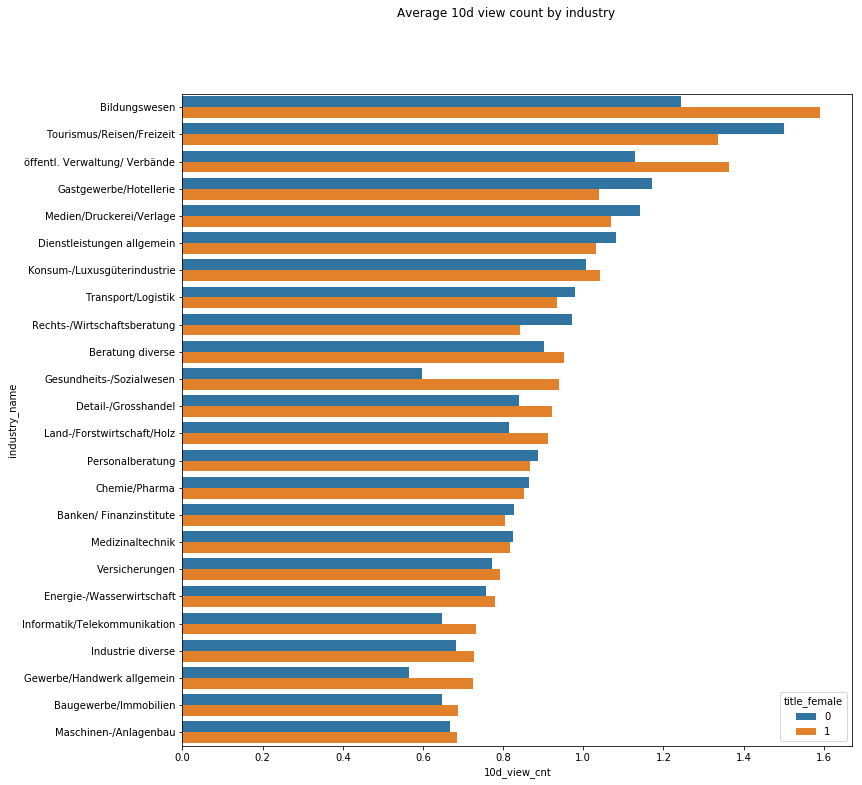

In [27]:
fig, ax = plt.subplots(figsize=(12, 12))
sns.barplot(y="industry_name", x="10d_view_cnt", 
            data=df.loc[df['title_lang'] == 'de', :].groupby(['industry_name', 'title_female'])['10d_view_cnt'].mean().reset_index().sort_values('10d_view_cnt', ascending = False), 
            hue = 'title_female', 
            ax = ax)
fig.suptitle('Average 10d view count by industry')
None

In [28]:
df.loc[df['title_lang'] == 'de', :].groupby(['industry_name', 'title_female'])['10d_view_cnt'].count().reset_index().sort_values('10d_view_cnt', ascending = False).head()

,industry_name,title_female,10d_view_cnt
18,Gesundheits-/Sozialwesen,0,4121
23,Industrie diverse,1,4056
22,Industrie diverse,0,2431
3,Baugewerbe/Immobilien,1,2409
13,Dienstleistungen allgemein,1,2379


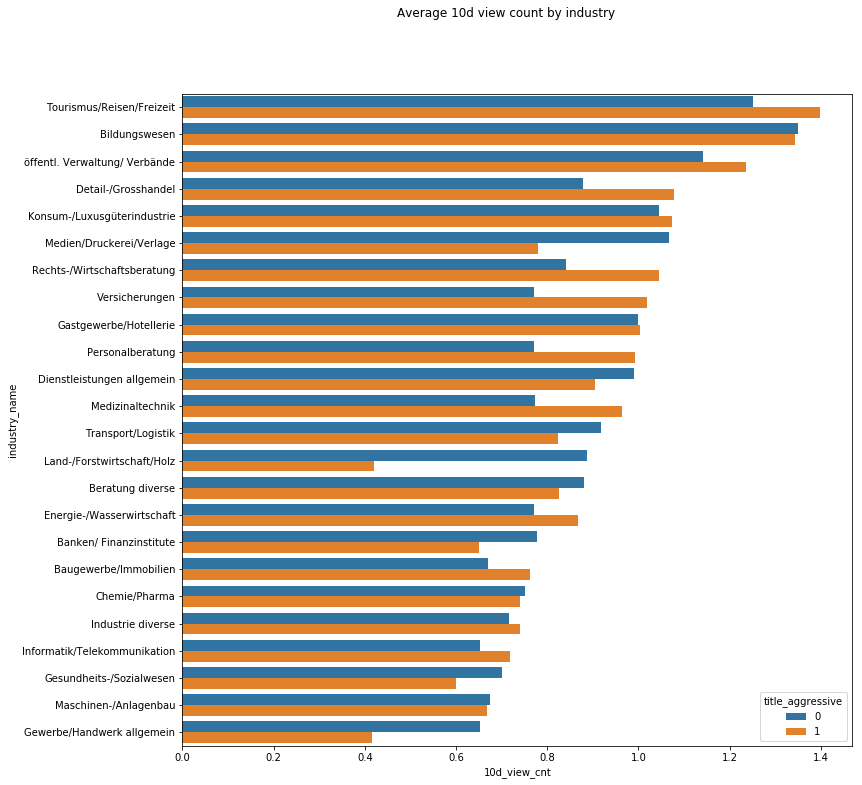

In [29]:
fig, ax = plt.subplots(figsize=(12, 12))
sns.barplot(y="industry_name", x="10d_view_cnt", 
            data=df.groupby(['industry_name', 'title_aggressive'])['10d_view_cnt'].mean().reset_index().sort_values('10d_view_cnt', ascending = False), 
            hue = 'title_aggressive', 
            ax = ax)
fig.suptitle('Average 10d view count by industry')
None

In [30]:
test = df.head(1000)

In [31]:
test.set_index('industry_name').loc[:, ['1d_view_cnt', 'days_online']].head()

,1d_view_cnt,days_online
industry_name,,
Industrie diverse,0.2372,32
Maschinen-/Anlagenbau,0.2883,32
Industrie diverse,0.1982,32
Maschinen-/Anlagenbau,0.2883,31
Industrie diverse,0.6456,32


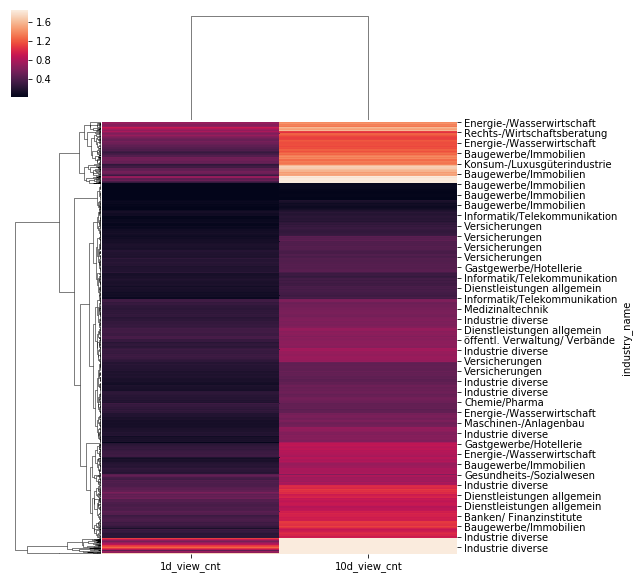

In [32]:
g = sns.clustermap(test.set_index('industry_name').loc[:, ['1d_view_cnt', '10d_view_cnt']], robust=True, figsize=(8, 10))

In [33]:
from scipy.spatial.distance import hamming
from scipy.cluster.hierarchy import linkage
from scipy.cluster import hierarchy
import numpy as np

In [34]:
from sklearn.preprocessing import MinMaxScaler

In [35]:
DAYS = 10 # 1, 10, or 30
df = df.loc[df['days_online'] >= DAYS]
#features = ['contract_pct_from', 'contract_pct_to', 'dayofyear', 'month', 'weekday', 'package_id', 'industry_name']
features = ['contract_pct_from', 'contract_pct_to', 'month', 'package_id', 'industry_name',# 'days_online', 
            'city', 'title_num_words', 'title_aggressive', 'title_female', 'title_percent',
            'title_location', 'title_diploma', 'title_chief', 'title_prob_en',
            'title_prob_de', 'title_prob_fr', '1d_view_cnt', '10d_view_cnt', '30d_view_cnt']
X = pd.get_dummies(df[features], columns=['package_id', 'city', 'industry_name', 'month'])

In [36]:
scaler = MinMaxScaler()

In [37]:
scaler.fit(X)

C:\anaconda3\lib\site-packages\sklearn\preprocessing\data.py:334: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


MinMaxScaler(copy=True, feature_range=(0, 1))

In [38]:
df_scaled = scaler.transform(X)

In [39]:

scaled_df = pd.DataFrame(df_scaled, columns=X.columns)

In [40]:
corr = 1 - scaled_df.corr() 

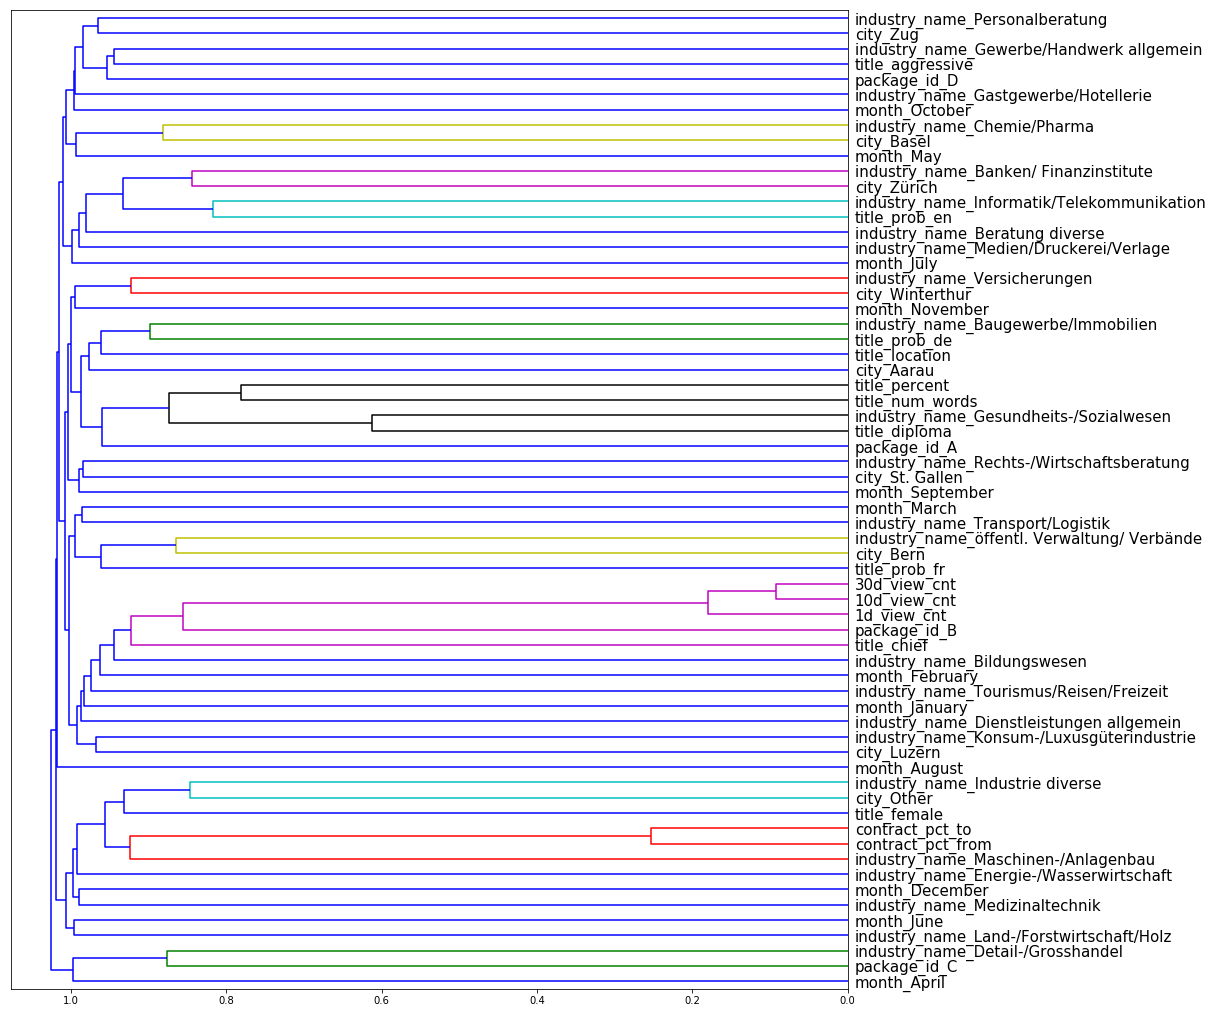

In [41]:
corr_condensed = hierarchy.distance.squareform(corr) # convert to condensed

z = hierarchy.linkage(corr_condensed, method='average')
plt.figure(figsize=(15, 18))
dendrogram = hierarchy.dendrogram(z, labels=corr.columns, orientation='left', color_threshold = 0.9*max(z[:,2]))
ax = plt.gca()
ax.tick_params(axis='y', which='major', labelsize=15)
plt.show()

## Subsets

### only city vs branche

In [42]:
DAYS = 10 # 1, 10, or 30
df = df.loc[df['days_online'] >= DAYS]
#features = ['contract_pct_from', 'contract_pct_to', 'dayofyear', 'month', 'weekday', 'package_id', 'industry_name']
features = ['city', 'industry_name']
X = pd.get_dummies(df[features], columns=['city', 'industry_name'])

In [43]:
scaler = MinMaxScaler()

In [44]:
scaler.fit(X)

C:\anaconda3\lib\site-packages\sklearn\preprocessing\data.py:334: DataConversionWarning: Data with input dtype uint8 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


MinMaxScaler(copy=True, feature_range=(0, 1))

In [45]:
df_scaled = scaler.transform(X)

In [46]:

scaled_df = pd.DataFrame(df_scaled, columns=X.columns)

In [47]:
corr = 1 - scaled_df.corr() 

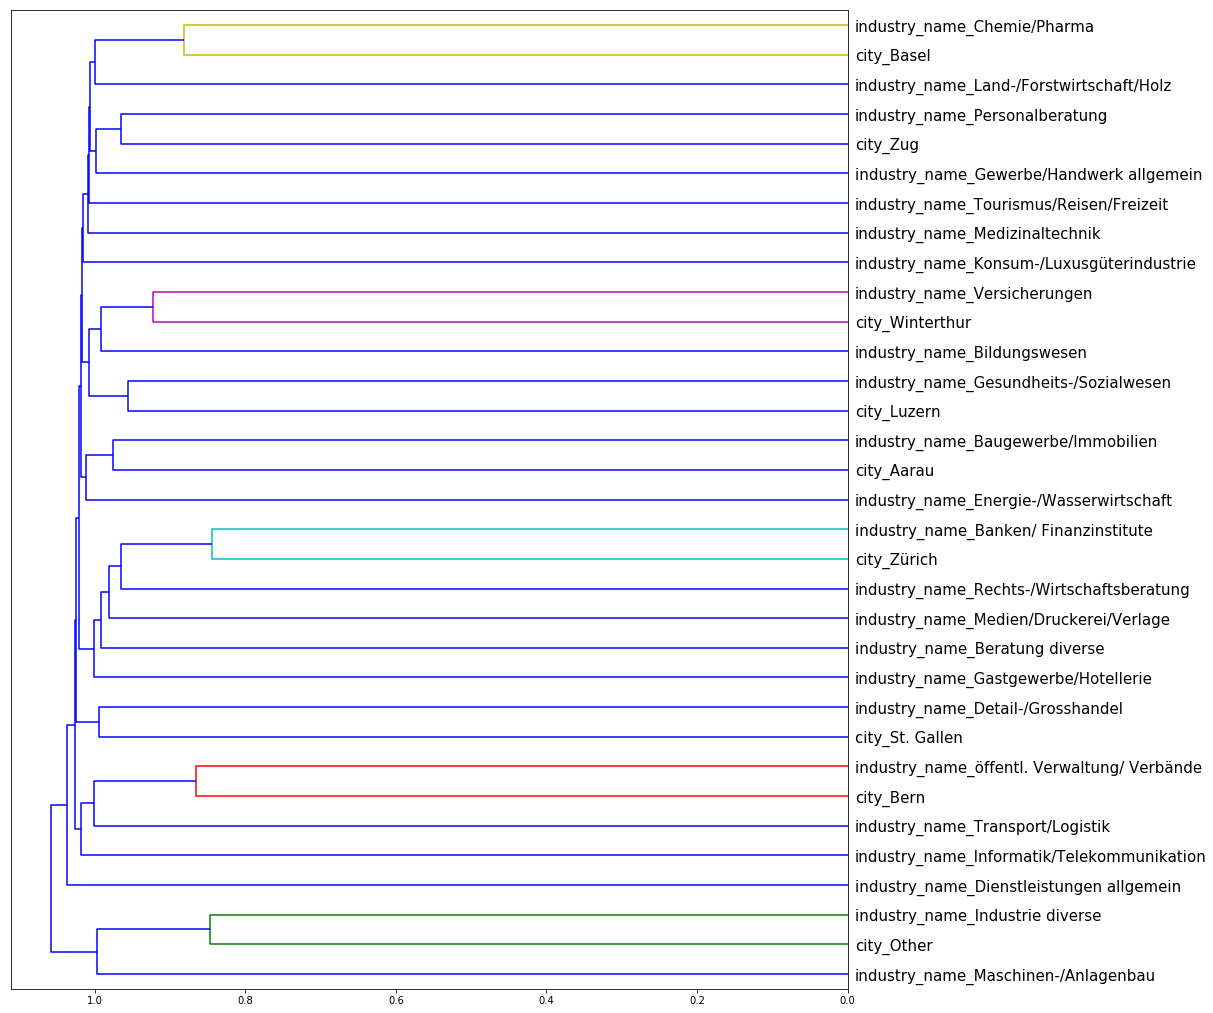

In [48]:
corr_condensed = hierarchy.distance.squareform(corr) # convert to condensed

z = hierarchy.linkage(corr_condensed, method='average')
plt.figure(figsize=(15, 18))
dendrogram = hierarchy.dendrogram(z, labels=corr.columns, orientation='left', color_threshold = 0.9*max(z[:,2]))
ax = plt.gca()
ax.tick_params(axis='y', which='major', labelsize=15)
plt.show()

### only package vs num words vs title female

In [49]:
DAYS = 10 # 1, 10, or 30
df = df.loc[df['days_online'] >= DAYS]
#features = ['contract_pct_from', 'contract_pct_to', 'dayofyear', 'month', 'weekday', 'package_id', 'industry_name']
features = ['title_female', 'title_num_words', 'title_prob_de', 'package_id']
X = pd.get_dummies(df[features], columns=[ 'package_id'])

In [50]:
scaler = MinMaxScaler()

In [51]:
scaler.fit(X)

C:\anaconda3\lib\site-packages\sklearn\preprocessing\data.py:334: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


MinMaxScaler(copy=True, feature_range=(0, 1))

In [52]:
df_scaled = scaler.transform(X)

In [53]:

scaled_df = pd.DataFrame(df_scaled, columns=X.columns)

In [54]:
corr = 1 - scaled_df.corr() 

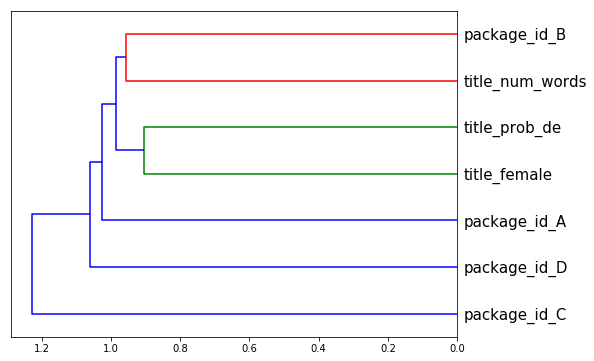

In [55]:
corr_condensed = hierarchy.distance.squareform(corr) # convert to condensed

z = hierarchy.linkage(corr_condensed, method='average')
plt.figure(figsize=(8, 6))
dendrogram = hierarchy.dendrogram(z, labels=corr.columns, orientation='left', color_threshold = 0.8*max(z[:,2]))
ax = plt.gca()
ax.tick_params(axis='y', which='major', labelsize=15)
plt.show()